In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, LabelEncoder
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.nn.functional import cross_entropy, softmax

In [19]:
np.set_printoptions(suppress=True)

In [134]:
DATA = '_02195759eb952fcd23b60d5b07594b7b_winequality-red.csv'

with open(DATA) as file:
    file.readline() # miss header line
    data = np.loadtxt(file, delimiter=';')

In [135]:
TRAIN_SIZE = 0.7
HIDDEN_NEURONS_NUM = 350

y = data[:, -1]
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
y -= y.min()
X = data[:, :-1]
X = normalize(X, axis=0)

# y_encoded = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE)

In [136]:
MAX_EPOCHS, lr = 120, 0.015
model = torch.nn.Sequential(
    nn.Linear(in_features=in_features, out_features=HIDDEN_NEURONS_NUM),
    nn.ReLU(),
    nn.Dropout(),
    nn.BatchNorm1d(HIDDEN_NEURONS_NUM),
    nn.Linear(in_features=HIDDEN_NEURONS_NUM, out_features=out_features),
    nn.Softmax(dim=1)
)
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=lr)


X_train, y_train = torch.tensor(X_train, dtype=torch.float), torch.tensor(y_train, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float), torch.tensor(y_test, dtype=torch.long)

In [137]:
def train(num_epochs):
    losses, test_losses = [], []
    for _ in range(num_epochs):
        model.train(True)
        preds = model(X_train)
        loss = loss_fn(preds, y_train)

        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss.item())

        model.train(False)
        test_losses.append(loss_fn(model(X_test), y_test).item())

    return losses, test_losses

In [138]:
def plot(losses, test_losses):
    fig = plt.figure(figsize=(10, 8))
    # plt.scatter(range(len(losses)), losses, linewidths=3)
    # plt.scatter(range(len(test_losses)), test_losses, linewidths=3)
    plt.plot(range(len(losses)), losses, linewidth=3, label='train loss')
    plt.plot(range(len(test_losses)), test_losses, linewidth=3, label='test loss')
    plt.grid()
    plt.xlabel('num_epochs')
    plt.ylabel('CrossEntropyLoss')
    plt.legend()
    plt.show()

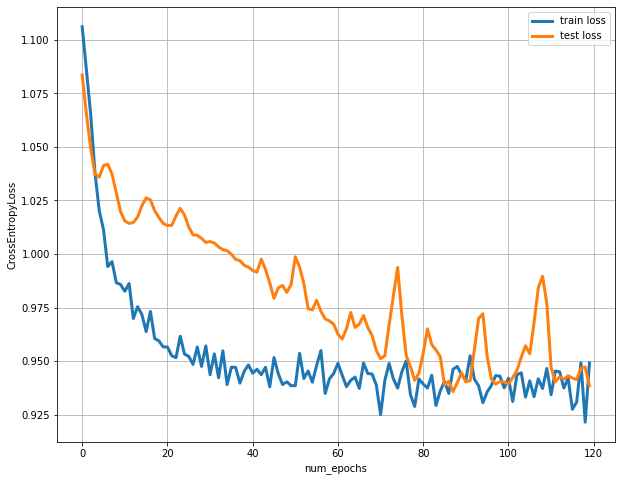

loss score 0.9384791851043701
accuracy score 0.5895833333333333


In [139]:
losses, test_losses = train(MAX_EPOCHS)
plot(losses, test_losses)

model.train(False)
preds = model(X_test)
loss = cross_entropy(preds, y_test)
print('loss score', loss.item())

preds = preds.data.numpy()
preds = np.argmax(preds, axis=1)
y_test = y_test.data.numpy()
print('accuracy score', np.mean(preds == y_test))

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, LabelEncoder
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.nn.functional import cross_entropy, softmax

np.set_printoptions(suppress=True)

DATA = '_02195759eb952fcd23b60d5b07594b7b_winequality-red.csv'

with open(DATA) as file:
    file.readline() # miss header line
    data = np.loadtxt(file, delimiter=';')


TRAIN_SIZE = 0.7
HIDDEN_NEURONS_NUM = 100

y = data[:, -1]
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
y -= y.min()
X = data[:, :-1]
X = normalize(X)


def train(num_epochs):
    losses, test_losses = [], []
    for _ in range(num_epochs):
        model.train(True)
        preds = model(X_train)
        loss = loss_fn(preds, y_train)

        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss.item())

        model.train(False)
        test_losses.append(loss_fn(model(X_test), y_test).item())

    return losses, test_losses


in_features, out_features = X.shape[1], len(np.unique(y))
loss_fn = nn.CrossEntropyLoss()

lr = [0.05, 0.03, 0.01, 0.007, 0.001]
num_epochs = range(100, 1001 - 500, 100)
k_fold = 3
folds_loss, folds_acc = [], []
for i in range(k_fold):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE)
    X_train, y_train = torch.tensor(X_train, dtype=torch.float), torch.tensor(y_train, dtype=torch.long)
    X_test, y_test = torch.tensor(X_test, dtype=torch.float), torch.tensor(y_test, dtype=torch.long)
    ep_loss, ep_acc = [], []
    for n_epochs in num_epochs:
        print('\t', n_epochs)
        model = torch.nn.Sequential(
            nn.Linear(in_features=in_features, out_features=HIDDEN_NEURONS_NUM),
            nn.ReLU(),
            nn.Dropout(),
            nn.BatchNorm1d(HIDDEN_NEURONS_NUM),
            nn.Linear(in_features=HIDDEN_NEURONS_NUM, out_features=out_features),
            nn.Softmax(dim=1)
        )
        lr_loss, lr_acc = [], []
        for lr_ in lr:
            print('\t\t', lr_)
            optim = torch.optim.Adam(model.parameters(), lr=lr_)
            for _ in range(n_epochs):
                model.train(True)
                preds = model(X_train)
                loss = loss_fn(preds, y_train)
                optim.zero_grad()
                loss.backward()
                optim.step()

            model.train(False)
            preds = model(X_test)
            loss = cross_entropy(preds, y_test).item()  #
            preds = np.argmax(preds.data.numpy(), axis=1)
            accuracy = np.mean(preds == y_test.data.numpy())  #

            lr_loss.append(loss), lr_acc.append(accuracy)

        ep_loss.append(lr_loss), ep_acc.append(lr_acc)

    folds_loss.append(ep_loss), folds_acc.append(ep_acc)

0
	 100
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 200
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 300
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 400
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 500
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
1
	 100
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 200
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 300
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 400
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 500
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
2
	 100
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 200
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 300
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 400
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001
	 500
		 0.05
		 0.03
		 0.01
		 0.007
		 0.001


In [2]:
folds_loss, folds_acc = np.array(folds_loss), np.array(folds_acc)
folds_loss.shape, folds_acc.shape

((3, 5, 5), (3, 5, 5))

In [13]:
mean_folds_loss, mean_folds_acc = folds_loss.mean(axis=0), folds_acc.mean(axis=0)
print(mean_folds_loss.shape, mean_folds_acc.shape)
n, k = np.unravel_index(np.argmin(mean_folds_loss, axis=None), mean_folds_loss.shape)
m, l = np.unravel_index(np.argmax(mean_folds_acc, axis=None), mean_folds_acc.shape)
print('min loss', mean_folds_loss[n, k], num_epochs[n], lr[k])
print('max acc', mean_folds_acc[m, l], num_epochs[m], lr[l])

(5, 5) (5, 5)
min loss 0.9066357215245565 200 0.001
max acc 0.6340277777777779 200 0.001
